# Import and Set Paths

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import statistics 
from scipy.stats import skew
import numpy as np
import pandas as pd
from google.oauth2 import service_account #Control API Keys
from google.cloud import vision
from pdf2image import convert_from_path #Libary convert pdf file to img file
import os
import io
import random
from random import randrange
from IPython.display import Image
from shapely.geometry import Polygon
import argparse
from enum import Enum
import io
from google.cloud.vision import types
from PIL import Image, ImageDraw
from PIL import ImageFont
from pyresparser import ResumeParser
import shutil
from shutil import copyfile
import random
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
doc = '/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_402.pdf'
docPath = '/Users/kunal/Documents/VdartResumeProject/VisionAPi/'
imgTxtVisionAPIPath = "/Users/kunal/Documents/VdartResumeProject/APIKEYSGOOGLE/resumeMatcher-pdf2img.json"
pdfIMGPopplerPath = '/Users/kunal/Documents/VdartResumeProject/Poppler/poppler-0.68.0_x86/poppler-0.68.0/bin/'
fontPath = '/Users/kunal/Documents/VdartResumeProject/Font/FreeMonoBold.ttf'
allResumesPath = "/Users/kunal/Documents/VdartResumeProject/50_resumes/"

# Create Img

In [ ]:
doubleCheckCreateNew = 0
choosenFile = ""
while True: 
    createNewImg = input("Do you want to create a new image")
    if createNewImg == "":
        print("Choosing \n" + doc)
        choosenFile = doc
        break
    elif createNewImg == "Y":
        print("You choose YES, possible files, choose number or enter for random")
        listofFiles = []
        for file in os.listdir(docPath):
            if file.endswith(".pdf"):
                print("\t" + file)
                listofFiles.append(file)
        while True:
            whichFile = input("Which File")
            if whichFile == "":
                choosenRandomTemp = random.choice(listofFiles)
                print("Choosing \n" + choosenRandomTemp)
                choosenFile = docPath + choosenRandomTemp
                break
            elif whichFile.isnumeric():
                print("Choosing \n" + "Document_" + whichFile + ".pdf")
                choosenFile = docPath + "Document_" + whichFile + ".pdf"
                break
            elif whichFile == "BREAK":
                print("Exiting")
                choosenFile = "INVALID"
                break
        break
    elif createNewImg == "BREAK":
        print("Exiting")
        choosenFile = "INVALID"
        break
if not os.path.isfile(choosenFile): 
    file = os.path.basename(choosenFile)
    for resume in os.listdir(allResumesPath):
        if file == resume:
            print(allResumesPath + resume)
            shutil.copyfile(allResumesPath + resume, docPath)
    if os.path.isfile(docPath + resume):
        choosenFile = "docPath + resume"  
if not os.path.isfile(choosenFile):
    print("Error has come up")
    print("Using Base value \n" + doc)
    choosenFile = doc

In [ ]:
multipleFiles = []
createImg = False
for i in os.listdir(docPath):
    if i.endswith(".jpg") and i.startswith(os.path.basename(choosenFile)[0:-4]):
        multipleFiles.append(i)
if len(multipleFiles) == 0:
    createImg = True
elif len(multipleFiles) == 1:
    imagePath = multipleFiles[0]
else:
    print(multipleFiles)
    possibleNum = len(multipleFiles)
    while True:
        whichImg = input("Which image do you want. Choose a number between 1 and " + str(possibleNum))
        if whichImg == "BREAK":
            print("Choosing first Img")
            imagePath = multipleFiles[0]
            break
        if not whichImg.isnumeric():
            print("Please choose a number")
        else:
            print("Choosen " + multipleFiles[int(whichImg)-1])
            imagePath = multipleFiles[int(whichImg)-1]
            break
        

In [ ]:
if createImg == True:
    uploaded_image_path = docPath
    uploaded_image = choosenFile
    os.chdir(uploaded_image_path) # Change the working diretory to path that contains the PDF file
    file_name = str(uploaded_image).replace('.pdf','') # file name for png still going to get changed later
    pages = convert_from_path(uploaded_image, 200,poppler_path=pdfIMGPopplerPath) #function to change pdf to img
    pageNumCount = 1 #numbering for all the different images if pdf is multiple pages
    outputNames = []
    for page in pages:
        output_file = file_name+"_"+str(pageNumCount) + '.jpg'#uptaded name for image
        page.save(output_file, 'JPEG')#save img
        pageNumCount +=1
        outputNames.append(output_file)
    print(outputNames)
    possibleNum = len(outputNames)
    while True:
        whichImg = input("Which image do you want. Choose a number between 1 and " + str(possibleNum))
        if whichImg == "BREAK":
            print("Choosing first Img")
            imagePath = outputNames[0]
            break
        if not whichImg.isnumeric():
            print("Please choose a number")
        else:
            print("Choosen " + outputNames[int(whichImg)-1])
            imagePath = outputNames[int(whichImg)-1]
            break

In [ ]:
print(imagePath)

# Display Document Img

In [4]:
imagePath = '/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_406_3.jpg'

In [5]:
#Using API from Google
#Returns a JSON file but text is extracted from it
keyDIR = imgTxtVisionAPIPath #JSON key file to call the api
credentials = service_account.Credentials.from_service_account_file(keyDIR) #using service account to go through google
client = vision.ImageAnnotatorClient(credentials=credentials) # client api

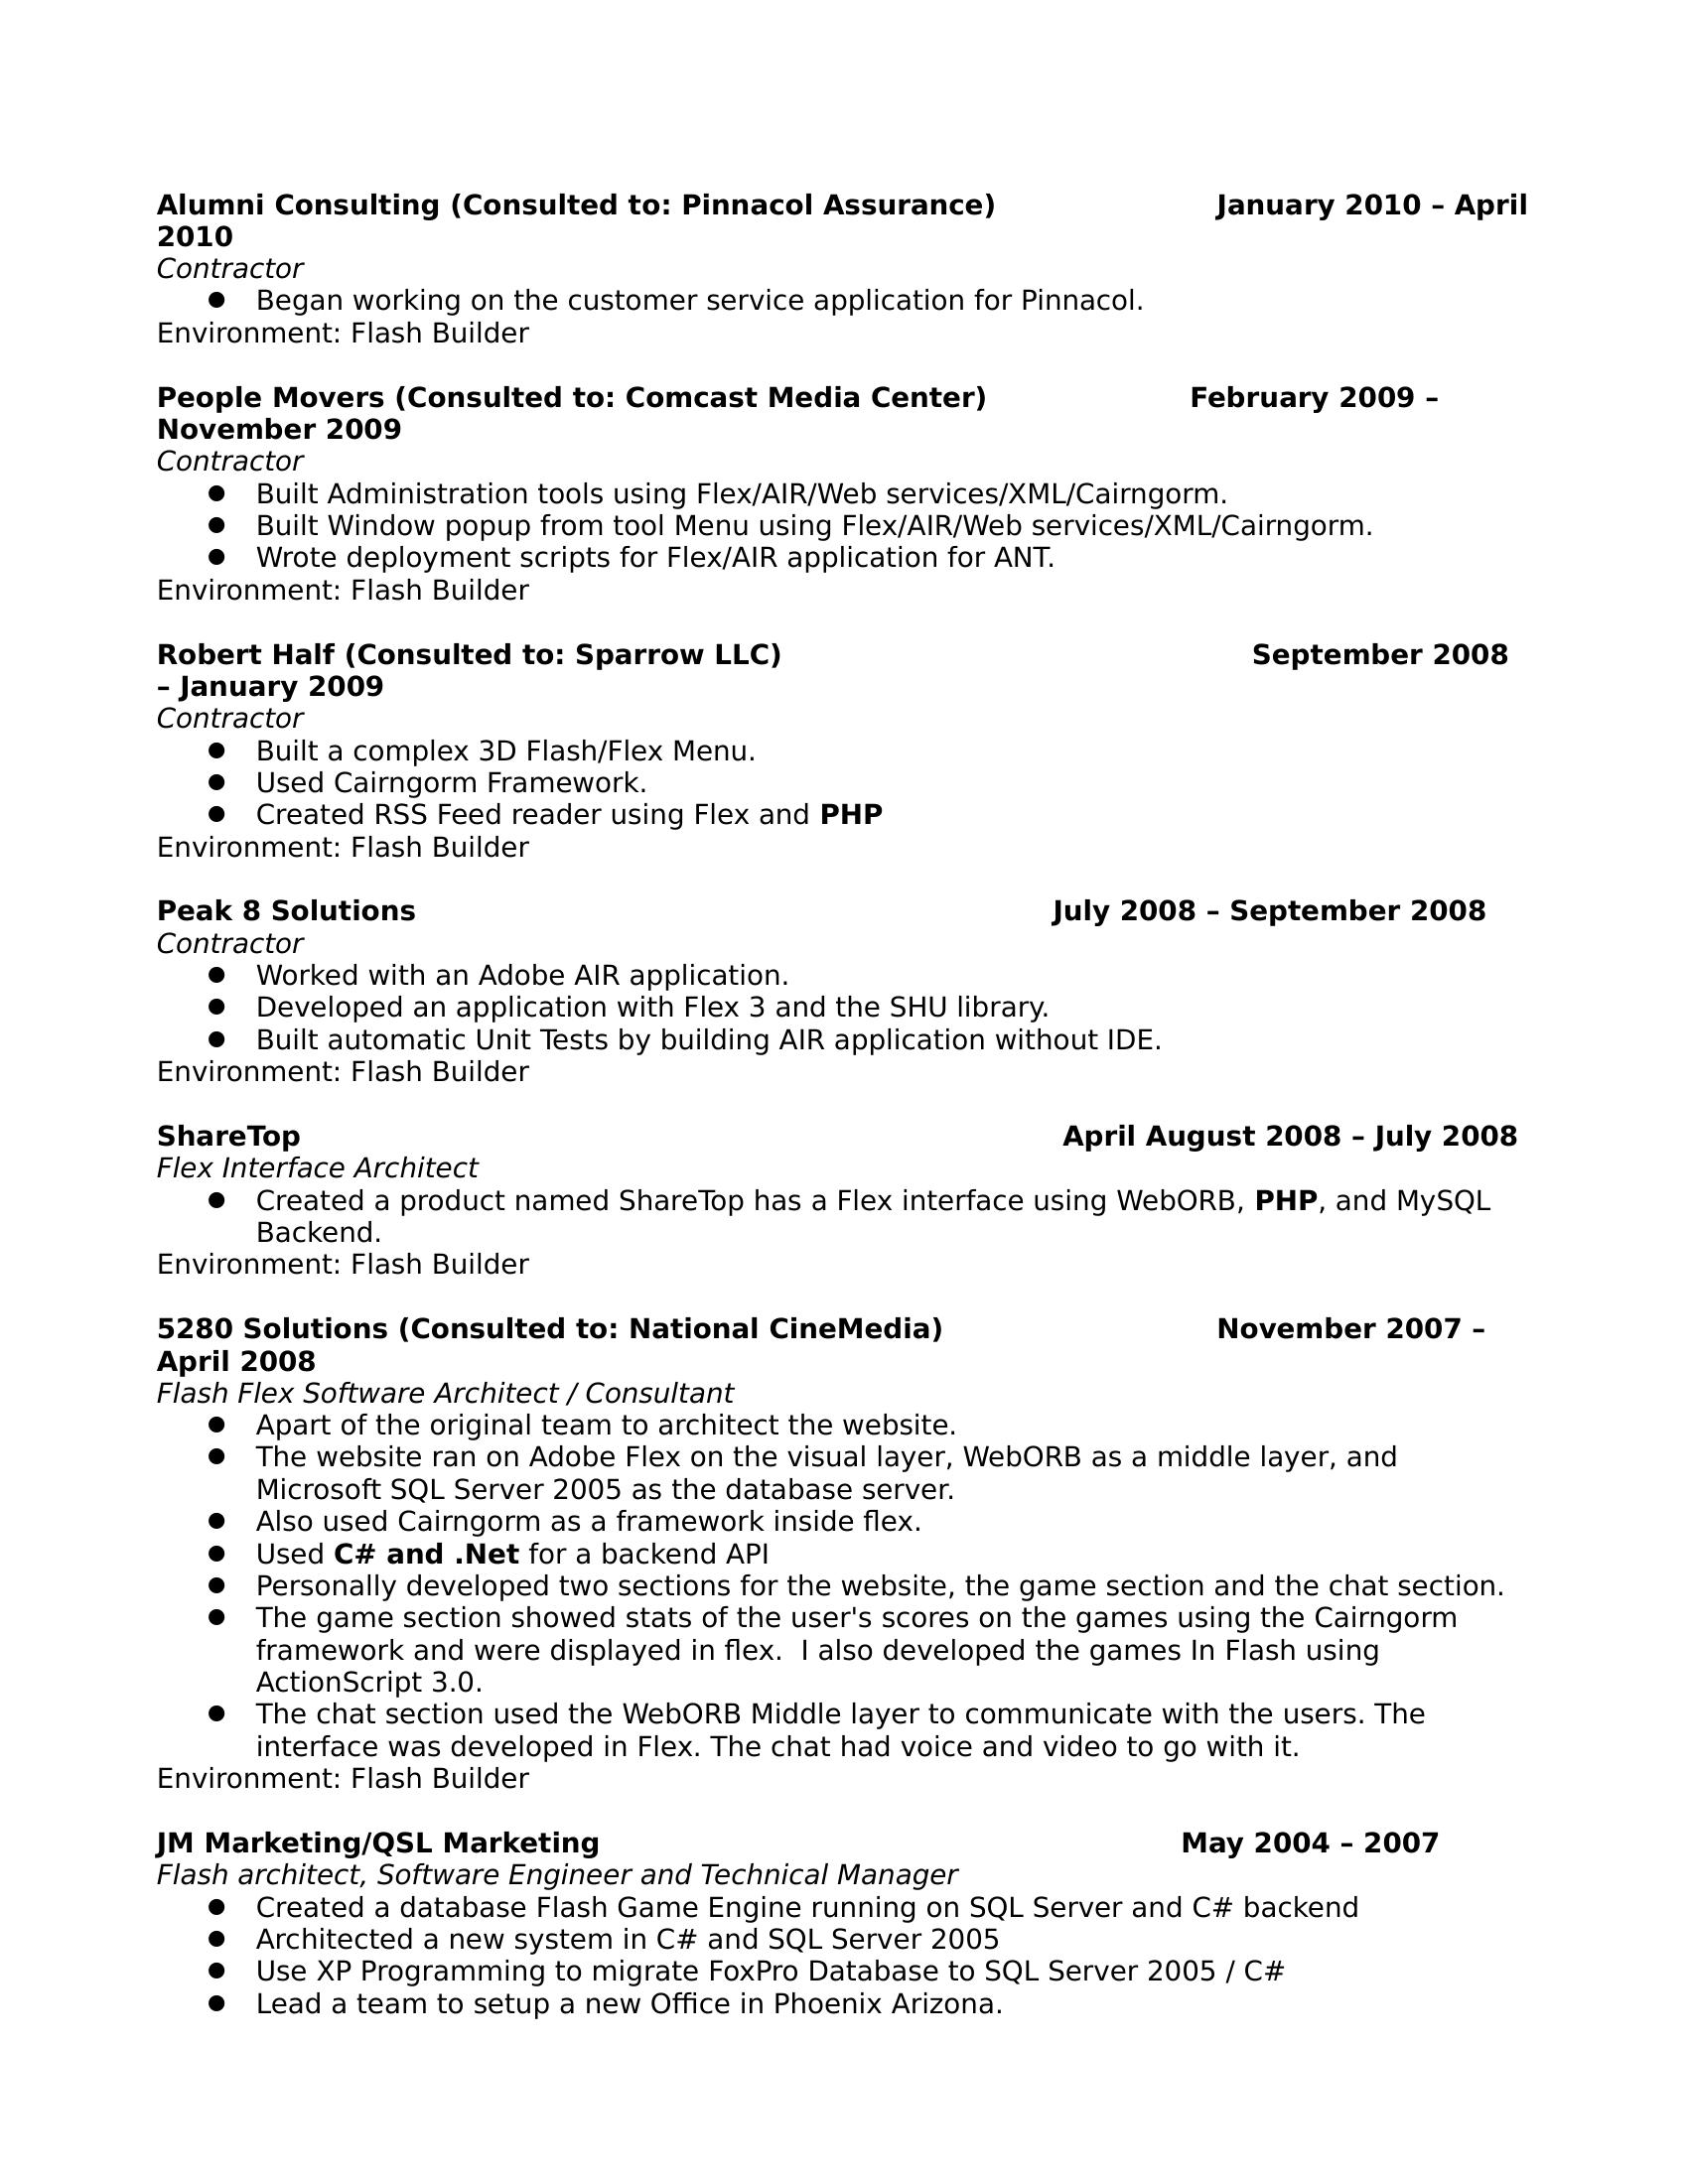

In [6]:
img = Image.open(imagePath)
img

# Get base information

In [ ]:
with io.open(imagePath, 'rb') as image_file: #opening and reading img
    content = image_file.read() 
image = vision.types.Image(content=content) 
response2 = client.label_detection(image=image)
for annotation in response2.label_annotations:
    print(annotation.description + "\t-->\t" + str(annotation.score)) #MID is a knowlege graph

In [ ]:
response4 = client.document_text_detection(image = image)
for i in response4.full_text_annotation.pages:
    print("WIDTH: " + str(i.width))
    print("HEIGHT: " + str(i.height))

In [ ]:
langConfid = []
for i in response4.full_text_annotation.pages:
    currentLangConfid = []
    #print(i.property.detected_languages)
    for lang in i.property.detected_languages:
        currentLangConfid.append(lang.language_code)
        #print(lang.confidence)
        currentLangConfid.append(lang.confidence)
    langConfid.append(currentLangConfid)

In [ ]:
#response3 = client.crop_hints(image = image)

In [ ]:
print(langConfid)

In [ ]:
#NOT REALLY HELPFUL
#response3

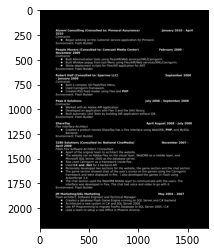

(2200, 1700, 3)


In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

my_img = cv2.imread(imagePath) 
inverted_img = (255.0 - my_img)  
final = inverted_img / 255.0

# Visualize the result
plt.imshow(final)
plt.show()

print(final.shape)

# Call API and get boundingBoxes

In [11]:
print(imagePath)

/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_406_3.jpg


In [7]:
keyDIR = imgTxtVisionAPIPath #JSON key file to call the api
credentials = service_account.Credentials.from_service_account_file(keyDIR) #using service account to go through google
client = vision.ImageAnnotatorClient(credentials=credentials) # client api
bounds = []
with io.open(imagePath, 'rb') as image_file:
    content = image_file.read()
image = types.Image(content=content)
response = client.document_text_detection(image=image)
document = response.full_text_annotation

## Functions

In [8]:
class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5
def get_document_bounds(image_file, feature):
    """Returns document bounds given an image."""
    #Using API from Google
    #Returns a JSON file but text is extracted from it
    bounds = []
    # Collect specified feature bounds by enumerating all document features
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if (feature == FeatureType.SYMBOL):
                            bounds.append(symbol.bounding_box)
                    if (feature == FeatureType.WORD):
                        bounds.append(word.bounding_box)
                if (feature == FeatureType.PARA):
                    bounds.append(paragraph.bounding_box)
            if (feature == FeatureType.BLOCK):
                bounds.append(block.bounding_box)
 
    return bounds
def getBoundingBoxes(filein):
    image = Image.open(filein)
    
    allb = []
    boundsB = get_document_bounds(filein, FeatureType.BLOCK)
    allb.append(boundsB)
    boundsPara = get_document_bounds(filein, FeatureType.PARA)
    allb.append(boundsPara)
    boundsWord = get_document_bounds(filein, FeatureType.WORD)
    allb.append(boundsWord)

    return allb

In [9]:
def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return image
def render_doc_text(filein):
    image = Image.open(filein)
    bounds = get_document_bounds(filein, FeatureType.BLOCK)
    draw_boxes(image, bounds, 'blue')
    bounds = get_document_bounds(filein, FeatureType.PARA)
    draw_boxes(image, bounds, 'red')
    bounds = get_document_bounds(filein, FeatureType.WORD)
    draw_boxes(image, bounds, 'yellow')
    #if fileout != 0:
        #image.save(fileout)
    #else:
    image.show()

In [10]:
image_file = imagePath

## Draw img using bounding boxes

In [11]:
#displayIMG
#render_doc_text(filein = image_file)

## Call function and get base info

In [12]:
boundBoxAll = getBoundingBoxes(imagePath)

In [13]:
print("Blocks\t\t"+str(len(boundBoxAll[0]))+"\nParagraghs\t\t"+str(len(boundBoxAll[1]))+"\nWords\t\t"+str(len(boundBoxAll[2])))

Blocks		9
Paragraghs		26
Words		436


# Find Area

In [ ]:
def findArea(bounds):
    matrix = ((bounds.vertices[0].x, bounds.vertices[0].y),
              (bounds.vertices[1].x, bounds.vertices[1].y),
              (bounds.vertices[2].x, bounds.vertices[2].y),
              (bounds.vertices[3].x, bounds.vertices[3].y))    
    polygon = Polygon(matrix)
    return polygon.area

# Draw outline

In [ ]:
def draw_single_box(image, bounds):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    draw.polygon([
        bounds.vertices[0].x, bounds.vertices[0].y,
        bounds.vertices[1].x, bounds.vertices[1].y,
        bounds.vertices[2].x, bounds.vertices[2].y,
        bounds.vertices[3].x, bounds.vertices[3].y],outline=(0,0,0,255))
    return image

In [ ]:
image = Image.open(imagePath)
findArea(boundBoxAll[0][0])
draw_single_box(image, boundBoxAll[0][0])

# Draw Translucent Box

In [ ]:
def drawsingleBoxVertice(imagefile, color, transp, vertices):
    bounds = vertices
    matrix = ((bounds.vertices[0].x, bounds.vertices[0].y),
              (bounds.vertices[1].x, bounds.vertices[1].y),
              (bounds.vertices[2].x, bounds.vertices[2].y),
              (bounds.vertices[3].x, bounds.vertices[3].y))    
    TINT_COLOR = color
    TRANSPARENCY = transp
    OPACITY = int(255 * TRANSPARENCY)
    img = Image.open(imagefile)
    img = img.convert("RGBA")
    overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
    draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
    img = Image.alpha_composite(img, overlay)
    img = img.convert("RGB") # Remove alpha for saving in jpg format.
    return img

In [ ]:
drawsingleBoxVertice(imagePath, (0,0,255), 0.25, boundBoxAll[0][0])

# Color all objects in pic

In [ ]:
def findMatrix(vert):
    matrix = ((vert.vertices[0].x, vert.vertices[0].y),
              (vert.vertices[1].x, vert.vertices[1].y),
              (vert.vertices[2].x, vert.vertices[2].y),
              (vert.vertices[3].x, vert.vertices[3].y))
    return matrix

In [ ]:
def colorALL(image_file, boundBoxAll):
    TINT_COLOR = (0,0,0) 
    #colors = [(0,255,0), (0,0,255), (255,0,0)]
    TRANSPARENCY = 0.25
    OPACITY = int(255 * TRANSPARENCY)
    img = Image.open(image_file)
    img = img.convert("RGBA")
    overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
    #for section in boundBoxAll:
    TINT_COLOR = (0,255,0) 
    for block in boundBoxAll[0]:
        matrix = findMatrix(block)
        draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
    TINT_COLOR = (0,0,255)
    for para in boundBoxAll[1]:
        matrix = findMatrix(para)
        draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
    TINT_COLOR = (255,0,0)
    for word in boundBoxAll[2]:
        matrix = findMatrix(word)
        draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
    img = Image.alpha_composite(img, overlay)
    img = img.convert("RGB") # Remove alpha for saving in jpg format.
    return img

In [ ]:
colorALL(imagePath, boundBoxAll)

# Highlight Skills

In [ ]:
def colorAllSkills(imagefile, listofSkills, document):
    allWords = []
    boxesForSkills = []
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    wordRun = ""
                    for symbol in word.symbols:
                        wordRun+=symbol.text
                    allWords.append(wordRun)
                    if wordRun in listofSkills:
                        boxesForSkills.append(word.bounding_box)
    TINT_COLOR = (0,0,0) 
    #colors = [(0,255,0), (0,0,255), (255,0,0)]
    TRANSPARENCY = 0.25
    OPACITY = int(255 * TRANSPARENCY)
    img = Image.open(imagefile)
    img = img.convert("RGBA")
    overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
    #for section in boundBoxAll:
    TINT_COLOR = (0,255,0) 
    for para in boxesForSkills:
        matrix = findMatrix(para)
        draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
    img = Image.alpha_composite(img, overlay)
    img = img.convert("RGB") # Remove alpha for saving in jpg format.
    return img

In [ ]:
skills = ["Internetworking", "Ubuntu", "CentOS"]

In [ ]:
p

# Automatic Entity Generated

In [ ]:
resumePDFPath = '/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_402.pdf'

In [ ]:
data = ResumeParser(resumePDFPath).get_extracted_data()

In [ ]:
allWordsTotal = []
for key in data:
    if data[key] is None:
        pass
    else:
        allWordsTotal.append([data[key], key])
allWords = []
boxesTotal = []
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                wordRun = ""
                for symbol in word.symbols:
                    wordRun+=symbol.text
                allWords.append(wordRun)
                for textext in allWordsTotal:
                    if type(textext[0]) == str:
                        if textext[0] == wordRun:
                            #print(textext[1] + wordRun)
                            boxesTotal.append([word.bounding_box, textext[1]])
                            #GOT IT
                        else:
                            for wordsingle in textext[0].split():
                                if wordsingle == wordRun:
                                    #print(textext[1] + wordRun)   
                                    boxesTotal.append([word.bounding_box, textext[1]])
                    elif type(textext[0]) == list:
                        for skillSingle in textext[0]:
                            if skillSingle == wordRun:
                                #print(textext[1] + wordRun)
                                boxesTotal.append([word.bounding_box, textext[1]])
                            else:
                                for wordsingle in skillSingle.split():
                                    if wordsingle == wordRun:
                                        #print(textext[1] + wordRun)   
                                        boxesTotal.append([word.bounding_box, textext[1]])
                #if wordRun in listofSkills:
                    #boxesForSkills.append(word.bounding_box)
colors = [(0,255,0), (0,0,255), (255,0,0), (255,255,0)]
TINT_COLOR = (0,0,0) 
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
font = ImageFont.truetype(fontPath, size=20)
#for section in boundBoxAll:
for para in boxesTotal:
    matrix = findMatrix(para[0])
    if para[1] == "name":
         TINT_COLOR = colors[0]
    if para[1] == "skills":
         TINT_COLOR = colors[1]
    if para[1] == "mobile_number":
         TINT_COLOR = colors[2]
    if para[1] == "email":
         TINT_COLOR = colors[3]
    draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
    textLocation = (matrix[0][0], matrix[0][1]-20)
    (x, y) = textLocation
    message = para[1]
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

# Using Spacy understand text and Display 

In [ ]:
def detectDate(text):
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_=="DATE":
            return True
    return False
def detectDateWord(text):
    doc = nlp(text)
    for entity in doc.ents:
        if entity.label_=="DATE":
            return entity.text.split()
    return []
"""def extract_emails(text):
    doc = nlp(text)
    for token in doc:
        if token.like_email:
            resultlis.append((token.text,token.idx, token.idx + len(token)))
    return resultlis
def extract_person_names(doc):
    personL = []
    for entity in doc.ents:
        if entity.label_=="PERSON":
            personL.append([entity.text, entity.start_char, entity.end_char])
    return personL
"""

In [ ]:
dateBoxes = []
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            paraRun = ""
            for word in paragraph.words:
                wordRun = ""
                for symbol in word.symbols:
                    wordRun+=symbol.text
                paraRun+=wordRun+" "
                
            if detectDate(paraRun.strip()):
                dateBoxes.append(paragraph.bounding_box)
            
color = (0,0,255)
TINT_COLOR = (0,0,0) 
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
font = ImageFont.truetype(fontPath, size=20)
#for section in boundBoxAll:
TINT_COLOR = color
for para in dateBoxes:
    matrix = findMatrix(para)
    textLocation = (matrix[0][0], matrix[0][1]-20)
    (x, y) = textLocation
    message = "Date"
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
for para in dateBoxes:
    matrix = findMatrix(para)
    textLocation = (matrix[0][0], matrix[0][1]-20)
    (x, y) = textLocation
    message = "Date"
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

# Get Area of Symbols and Words to extract large words

In [ ]:
areaSymbol = []
areaWord = []
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                for symbol in word.symbols:
                    #print(symbol.text+" " +str(findArea(symbol.bounding_box)))
                    areaSymbol.append(findArea(symbol.bounding_box))
                areaWord.append(findArea(word.bounding_box))

In [ ]:
plt.style.use('ggplot')
(n, bins, patches) = plt.hist(areaSymbol, bins = 25)
plt.title("Area of Characters")
plt.show()
res = statistics.median(areaSymbol)
print("Normal size of character {}".format(res))
print("Total Number of characters {}".format(len(areaSymbol)))

In [ ]:
plt.style.use('ggplot')
plt.hist(areaWord, bins = 20)
plt.title("Area of Words")
plt.show()
res = statistics.median(areaWord)
print("Normal size of character {}".format(res))
print("Total Number of characters {}".format(len(areaWord)))

In [ ]:
def detect_Maximum_outlier(data_1):
    #z = (X — μ) / σ
    #Formula for Z score = (Observation — Mean)/Standard Deviation
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold and y > mean_1:
            outliers.append(y)
    return outliers
def findMaxOutliersIQR(datasetInput):
    dataset = sorted(datasetInput)
    q1, q3= np.percentile(dataset,[25,75])
    iqr = q3 - q1
    upper_bound = q3 +(1.5 * iqr) 
    outliers=[]
    for num in dataset:
        if num>upper_bound:
            outliers.append(num)
    return outliers
def averageOfBothOutliers(data):
    return (min(detect_Maximum_outlier(data)) + min(findMaxOutliersIQR(data)))/2

In [ ]:
#symbolOutlierAverage = min(detect_Maximum_outlier(areaSymbol))
#symbolOutilerAverage = min(findMaxOutliersIQR(areaSymbol))averageOfBothOutliers(data)
symbolOutlierAverage = averageOfBothOutliers(areaSymbol)
print(symbolOutlierAverage)
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                runningWord = ""
                listofSymbolsAreas = []
                for symbol in word.symbols:
                    #print(symbol.text+" " +str(findArea(symbol.bounding_box)))
                    if findArea(symbol.bounding_box)>symbolOutlierAverage:
                        print(symbol.text)
                        countSymbolBig = True
                        listofSymbolsAreas.append(findArea(symbol.bounding_box))
                    else:
                        countSymbolBig = False
                    runningWord+=symbol.text
                if countSymbolBig and sum(listofSymbolsAreas)/len(listofSymbolsAreas) > symbolOutlierAverage:
                    print(runningWord + "\t\tAREA\t" +  str(findArea(word.bounding_box)) + "\t\t\tAVERAGE\t" + 
                         str(sum(listofSymbolsAreas)/len(listofSymbolsAreas)))

In [ ]:
boundingBoxForLarge = []
#symbolOutilerAverage = min(findMaxOutliersIQR(areaSymbol))averageOfBothOutliers(data)
symbolOutilerAverage = averageOfBothOutliers(areaSymbol)
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                runningWord = ""
                listofSymbolsAreas = []
                for symbol in word.symbols:
                    #print(symbol.text+" " +str(findArea(symbol.bounding_box)))
                    if findArea(symbol.bounding_box)>symbolOutlierAverage:
                        #print(symbol.text)
                        countSymbolBig = True
                        listofSymbolsAreas.append(findArea(symbol.bounding_box))
                    else:
                        countSymbolBig = False
                    runningWord+=symbol.text
                if countSymbolBig and sum(listofSymbolsAreas)/len(listofSymbolsAreas) > symbolOutilerAverage:
                    #print(runningWord + "\t" +  str(findArea(word.bounding_box)))
                    #print(sum(listofSymbolsAreas)/len(listofSymbolsAreas))
                    boundingBoxForLarge.append(word.bounding_box)
color = (0,0,255)
TINT_COLOR = (0,0,0) 
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
font = ImageFont.truetype(fontPath, size=20)
#for section in boundBoxAll:
TINT_COLOR = color
for large in boundingBoxForLarge:
    matrix = findMatrix(large)
    textLocation = (matrix[0][0], matrix[0][1]-20)
    (x, y) = textLocation
    message = "BigWord"
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

# Highlight Capital Large Letter

In [ ]:
lsttester = []
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                runningWord = ""
                uppercaseLetterCt = 0
                totalSymbolsLeterCt = 0
                for symbol in word.symbols:
                    if symbol.text.isupper():
                        uppercaseLetterCt+=1
                    totalSymbolsLeterCt+=1
                    runningWord+=symbol.text
                if uppercaseLetterCt == totalSymbolsLeterCt:
                    lsttester.append(findArea(word.bounding_box))
thresholdAreaCapitailWord = min(findMaxOutliersIQR(lsttester))                 

In [ ]:
boundingBoxForLargeCapital = []
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                runningWord = ""
                uppercaseLetterCt = 0
                totalSymbolsLeterCt = 0
                for symbol in word.symbols:
                    if symbol.text.isupper():
                        uppercaseLetterCt+=1
                    totalSymbolsLeterCt+=1
                    runningWord+=symbol.text
                if uppercaseLetterCt == totalSymbolsLeterCt and findArea(word.bounding_box) > thresholdAreaCapitailWord:
                    #print(runningWord)
                    #print(findArea(word.bounding_box))
                    boundingBoxForLargeCapital.append(word.bounding_box)
color = (0,0,255)
TINT_COLOR = (0,0,0) 
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
font = ImageFont.truetype(fontPath, size=20)
#for section in boundBoxAll:
TINT_COLOR = color
for large in boundingBoxForLargeCapital:
    matrix = findMatrix(large)
    textLocation = (matrix[0][0], matrix[0][1]-20)
    (x, y) = textLocation
    message = "BigCapitalWord"
    color = 'rgb(0, 0, 0)' # black color
    draw.text((x, y), message, fill=color, font=font)
    draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

# Eroision

In [ ]:
import numpy

In [ ]:
boxesForSymbols = []
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                wordtext = ""
                
                for symbol in word.symbols:
                    wordtext+=symbol.text
                    boxesForSymbols.append(symbol.bounding_box)
                if wordtext == "Alumni":
                    polygon = word.bounding_box
                    break
matrix = [(polygon.vertices[0].x, polygon.vertices[0].y),
          (polygon.vertices[1].x, polygon.vertices[1].y),
          (polygon.vertices[2].x, polygon.vertices[2].y),
          (polygon.vertices[3].x, polygon.vertices[3].y)]

In [ ]:
if polygon.vertices[0].x == polygon.vertices[3].x and polygon.vertices[0].y == polygon.vertices[1].y and polygon.vertices[1].x == polygon.vertices[2].x and polygon.vertices[2].y == polygon.vertices[3].y:
    matrixCrop = (polygon.vertices[0].x, polygon.vertices[0].y, polygon.vertices[2].x, polygon.vertices[2].y)

In [ ]:
matrixCrop

In [ ]:
imagePath

In [ ]:
img_path = 'z.png'
img = cv2.imread(img_path, 0)

In [ ]:
img_reverted= cv2.bitwise_not(img)
new_img = img_reverted / 255.0 

In [ ]:
zeroRowCounts = []
rowCount = 1
for row in new_img:
    if all(elem == 0 for elem in row):
        zeroRowCounts.append(rowCount)
    rowCount+=1

In [14]:
def contiguousRanges(nums: List[int]) -> int:
    if len(nums) < 2: return []
    if len(nums) == 2: return [nums]

    l, group, diff = [], [nums[0], nums[1]], nums[1] - nums[0]
    flagged = False
    for i in range(2, len(nums)):
        prevDiff, diff = diff, nums[i] - group[-1]
        if flagged:
            prevDiff = diff
            flagged = False
        if diff == prevDiff:
            group.append(nums[i])
        else:
            l.append([group[0], group[-1]])
            group = [nums[i]]
            flagged = True

    if not flagged: l.append([group[0], group[-1]])
    return l

NameError: name 'List' is not defined

In [ ]:
def find(img_path2):
    img_path = img_path2
    img = cv2.imread(img_path, 0)
    img_reverted= cv2.bitwise_not(img)
    new_img = img_reverted / 255.0 
    zeroRowCounts = []
    rowCount = 1
    for row in new_img:
        if all(elem == 0 for elem in row):
            zeroRowCounts.append(rowCount)
        rowCount+=1
    newRemovedZeroImg = []
    for row in new_img:
        if not all(elem == 0 for elem in row):
            newArrayRow = []
            for valuer in row:
                newArrayRow.append(valuer)
            newRemovedZeroImg.append(newArrayRow)
    newRemovedZeroImgOnly01 = []
    for row in new_img:
        if not all(elem == 0 for elem in row):
            newArrayRowz = []
            for valuer in row:
                if valuer >= 0.5:
                    newArrayRowz.append(1.0)
                else:
                    newArrayRowz.append(0.0)
            newRemovedZeroImgOnly01.append(newArrayRowz)
    ctYes = 0
    for row in newRemovedZeroImgOnly01:
        for value in row:
            if value != 0:
                ctYes+=1
    var1 = round(ctYes/(len(newRemovedZeroImgOnly01)*len(newRemovedZeroImgOnly01[0]))*100,4)
    ctYes = 0
    for row in newRemovedZeroImg:
        for value in row:
            if value != 0:
                ctYes+=1
    var2 = round(ctYes/(len(newRemovedZeroImg)*len(newRemovedZeroImg[0]))*100,4)
    return var1,var2

In [ ]:
boxesForSymbols = []
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                wordtext = ""
                for symbol in word.symbols:
                    wordtext+=symbol.text
                if wordtext == "Alumni" or wordtext == "Assurance" or wordtext== "customer" or wordtext == "application":
                    groupBoundingForWord = []
                    for symbol in word.symbols:
                        groupBoundingForWord.append(symbol.bounding_box)
                    boxesForSymbols.append(groupBoundingForWord)

In [ ]:
boxesForSymbols = boxesForSymbols[0:4]

In [ ]:
for boxes in boxesForSymbols[0]:
    polygon = boxes
    if polygon.vertices[0].x == polygon.vertices[3].x and polygon.vertices[0].y == polygon.vertices[1].y and polygon.vertices[1].x == polygon.vertices[2].x and polygon.vertices[2].y == polygon.vertices[3].y:
        matrixCrop = (polygon.vertices[0].x, polygon.vertices[0].y, polygon.vertices[2].x, polygon.vertices[2].y)
    else:
        print("fsdafSDaf")
    im = Image.open(imagePath).convert("RGBA")
    im_crop = im.crop(matrixCrop)
    im_crop.save("testingIMG.png")
    num1, num2 = find("testingIMG.png")
    print(str(num1) + "\t" + str(num2))

In [ ]:
"""
Go by words 
1) Extract word
2) For each symbol in word convert image to array (RGB removed) 0-1 range of each pixel
3) New array with only 0 and 1 (remove RGB)
4) Find percent of area filled by character
5) For each character in entire document group it by type of symbol (a,b,c,d..etc)
6) Find average area taken in by symbol
7) Compare that to area of testing symbol in step 4
8) Count in the number of characters that was taken in when finding average area of cymbol (step 6)
9) Make decision if character is bold or not
10) Look at entire word and see if average is a bold word
11) Look at entire paragraphs to check if paragraph is bold
12) Highlight everything
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
http://mile.ee.iisc.ac.in/publications/softCopy/DocumentAnalysis/Sai_NCVPRIPG2013.pdf
https://homepages.inf.ed.ac.uk/rbf/HIPR2/erode.htm
"""

In [ ]:
import string

In [ ]:
alphaList = list(string.ascii_lowercase)

In [ ]:
allbbChar = []
for charater in alphaList:
    charbb = []
    for page in document.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        if symbol.text == charater:
                            charbb.append(symbol.bounding_box)
    allbbChar.append(charbb)

In [ ]:
for i in range(len(allbbChar)):
    print(alphaList[i] + "\t" +  str(len(allbbChar[i])))

In [ ]:
def convertBoundBoxtodiagonalRectangual(polygon):
    if (abs(polygon.vertices[0].x - polygon.vertices[3].x)<=1 and 
        abs(polygon.vertices[0].y - polygon.vertices[1].y)<=1 and 
        abs(polygon.vertices[1].x - polygon.vertices[2].x)<=1 and 
        abs(polygon.vertices[2].y - polygon.vertices[3].y)<=1):
        matrixCrop = (min(polygon.vertices[0].x, polygon.vertices[3].x),
                      min(polygon.vertices[0].y, polygon.vertices[1].y),
                      max(polygon.vertices[1].x, polygon.vertices[2].x),
                      max(polygon.vertices[2].y, polygon.vertices[3].y))
    else:
        print("ERROR")
        matrixCrop = (0,0,0,0)
    return matrixCrop

In [ ]:
plt.style.use('ggplot')
(n, bins, patches) = plt.hist(lstofNum, bins = 25)
plt.title("Average Percent of area taken my character")
plt.show()
# decided on 40 percent


In [ ]:
plt.style.use('ggplot')
(n, bins, patches) = plt.hist(lstofNum2, bins = 25)
plt.title("Average Percent of area taken my character test 2")
plt.show()

In [ ]:
totalofCharThreshold = []
count = 0
for char in allbbChar:
    runningCharThres = [alphaList[count]]
    lstofNum = []
    lstofNum2 = []
    for singleChar in char:
        cropPoints = convertBoundBoxtodiagonalRectangual(singleChar)
        im = Image.open(imagePath).convert("RGBA")
        im_crop = im.crop(cropPoints)
        im_crop.save("char.png")
        num1, num2 = find("char.png")
        #print(str(num1) + "\t" + str(num2))
        lstofNum.append(num1)
        lstofNum2.append(num2)
    #plt.style.use('ggplot')
    #(n, bins, patches) = plt.hist(lstofNum)
    #plt.title("Average Percent of area taken my character {}".format((len(char))))
    if len(lstofNum) != 0:
        dataset = sorted(lstofNum)
        q1, q3= np.percentile(dataset,[25,75])
        iqr = q3 - q1
        upper_bound = q3 +(1.5 * iqr) 
        #print("{} \t {} \t {} \t {}".format(q1, q3, iqr, upper_bound))
    else:
        upper_bound = 0
    #plt.show()
    runningCharThres.append(upper_bound)
    # decided on 40 percent
    count+=1
    totalofCharThreshold.append(runningCharThres)

In [ ]:
totalofCharThreshold

In [ ]:
boxesForCharsGood = []
boxesForCharsbad = []
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                for symbol in word.symbols:
                    for charGroup in totalofCharThreshold:
                        if symbol.text.strip().lower() == charGroup[0]:
                            cropPoints = convertBoundBoxtodiagonalRectangual(symbol.bounding_box)
                            im = Image.open(imagePath).convert("RGBA")
                            im_crop = im.crop(cropPoints)
                            im_crop.save("char.png")
                            num1, num2 = find("char.png")
                            if num1 >= charGroup[1]:
                                boxesForCharsGood.append(symbol.bounding_box)
                                print("YES \t" + symbol.text.strip().lower() + "\t" + str(num1) + "\t" + str(charGroup[1]) )
                            else:
                                boxesForCharsbad.append(symbol.bounding_box)
                                print("NO \t" + symbol.text.strip().lower() + "\t" + str(num1) + "\t" + str(charGroup[1]) )
                        else:
                            cropPoints = convertBoundBoxtodiagonalRectangual(symbol.bounding_box)
                            im = Image.open(imagePath).convert("RGBA")
                            im_crop = im.crop(cropPoints)
                            im_crop.save("char.png")
                            num1, num2 = find("char.png")
                            if num1 >= 40:
                                boxesForCharsGood.append(symbol.bounding_box)
                            else:
                                boxesForCharsbad.append(symbol.bounding_box)

In [ ]:
TINT_COLOR = (0,0,0) 
#colors = [(0,255,0), (0,0,255), (255,0,0)]
TRANSPARENCY = 0.25
OPACITY = int(255 * TRANSPARENCY)
img = Image.open(imagePath)
img = img.convert("RGBA")
overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
draw = ImageDraw.Draw(overlay)  # Create a context for drawing things on it.
#for section in boundBoxAll:
TINT_COLOR = (0,255,0) 
for para in boxesForCharsGood:
    matrix = findMatrix(para)
    draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
TINT_COLOR = (255,0,0) 
for para in boxesForCharsbad:
    matrix = findMatrix(para)
    draw.polygon(matrix, fill=TINT_COLOR+(OPACITY,))
img = Image.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.
img

In [ ]:
# read image as RGB and add alpha (transparency)
im = Image.open(imagePath).convert("RGBA")
# convert to numpy (for convenience)
imArray = numpy.asarray(im)

In [ ]:
# create mask
polygon = matrix
maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = numpy.array(maskIm)

In [ ]:
# assemble new image (uint8: 0-255)
newImArray = numpy.empty(imArray.shape,dtype='uint8')

In [ ]:
# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

In [ ]:
# transparency (4th column)
newImArray[:,:,3] = mask*255

In [ ]:
# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
newIm

# Trying to understand how to comprehend Data

In [ ]:
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            paraRun = ""
            for word in paragraph.words:
                wordRun = ""
                numSymbols = 0
                for symbol in word.symbols:
                    wordRun+=symbol.text
                    numSymbols+=1
                paraRun+=wordRun+" "
                print(wordRun+" " +str(findArea(word.bounding_box)))

In [ ]:
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            paraRun = ""
            wordCount = 0
            areaListEachWord = []
            for word in paragraph.words:
                wordRun = ""
                for symbol in word.symbols:
                    wordRun+=symbol.text
                paraRun+=wordRun+" "
                areaListEachWord.append(findArea(word.bounding_box))
                wordCount+=1
            print(str(wordCount) + " "+ str(sum(areaListEachWord)) + " " +str(findArea(paragraph.bounding_box)))
            print(paraRun)
            print(sum(areaListEachWord) / len(areaListEachWord))
            print("\n")

In [ ]:
5808.0 + 5115.0 + 7029.0

In [ ]:
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            paraRun = ""
            for word in paragraph.words:
                wordRun = ""
                for symbol in word.symbols:
                    wordRun+=symbol.text
                paraRun+=wordRun+" "
            print(paraRun)

# Tesseract Other

In [ ]:
from tesserocr import PyTessBaseAPI

images = ['/Users/kunal/Documents/VdartResumeProject/VisionAPi/Document_402_1_2.jpg']

with PyTessBaseAPI() as api:
    for img in images:
        api.SetImageFile(img)
        print(api.GetUTF8Text())
        print(api.AllWordConfidences())

In [ ]:
import tesserocr
from PIL import Image

print(tesserocr.tesseract_version())  # print tesseract-ocr version
print(tesserocr.get_languages())  # prints tessdata path and list of available languages

image = Image.open(imagePath)
print(tesserocr.image_to_text(image))  # print ocr text from image
# or
print(tesserocr.file_to_text('sample.jpg'))

In [ ]:
from PIL import Image
from tesserocr import PyTessBaseAPI, RIL

image = Image.open(imagePath)
with PyTessBaseAPI() as api:
    api.SetImage(image)
    boxes = api.GetComponentImages(RIL.TEXTLINE, True)
    print('Found {} textline image components.'.format(len(boxes)))
    for i, (im, box, _, _) in enumerate(boxes):
        # im is a PIL image object
        # box is a dict with x, y, w and h keys
        api.SetRectangle(box['x'], box['y'], box['w'], box['h'])
        ocrResult = api.GetUTF8Text()
        conf = api.MeanTextConf()
        print(u"Box[{0}]: x={x}, y={y}, w={w}, h={h}, "
              "confidence: {1}, text: {2}".format(i, conf, ocrResult, **box))

In [ ]:
from PIL import Image
from tesserocr import PyTessBaseAPI, PSM

with PyTessBaseAPI(psm=PSM.AUTO_OSD) as api:
    image = Image.open(imagePath)
    api.SetImage(image)
    api.Recognize()

    it = api.AnalyseLayout()
    orientation, direction, order, deskew_angle = it.Orientation()
    print("Orientation: {:d}".format(orientation))
    print("WritingDirection: {:d}".format(direction))
    print("TextlineOrder: {:d}".format(order))
    print("Deskew angle: {:.4f}".format(deskew_angle))

In [ ]:
from tesserocr import PyTessBaseAPI, PSM

with PyTessBaseAPI(psm=PSM.OSD_ONLY) as api:
    api.SetImageFile(imagePath)

    os = api.DetectOS()
    print("Orientation: {orientation}\nOrientation confidence: {oconfidence}\n"
          "Script: {script}\nScript confidence: {sconfidence}".format(**os))

In [ ]:
from tesserocr import PyTessBaseAPI, PSM, OEM

with PyTessBaseAPI(psm=PSM.OSD_ONLY, oem=OEM.LSTM_ONLY) as api:
    api.SetImageFile(imagePath)

    os = api.DetectOrientationScript()
    print("Orientation: {orient_deg}\nOrientation confidence: {orient_conf}\n"
          "Script: {script_name}\nScript confidence: {script_conf}".format(**os))

In [ ]:
from __future__ import print_function

from tesserocr import PyTessBaseAPI, RIL, iterate_level

with PyTessBaseAPI() as api:
    api.SetImageFile(imagePath)
    api.SetVariable("save_blob_choices", "T")
    api.SetRectangle(37, 228, 548, 31)
    api.Recognize()

    ri = api.GetIterator()
    level = RIL.SYMBOL
    for r in iterate_level(ri, level):
        symbol = r.GetUTF8Text(level)  # r == ri
        conf = r.Confidence(level)
        if symbol:
            print(u'symbol {}, conf: {}'.format(symbol, conf), end='')
        indent = False
        ci = r.GetChoiceIterator()
        for c in ci:
            if indent:
                print('\t\t ', end='')
            print('\t- ', end='')
            choice = c.GetUTF8Text()  # c == ci
            print(u'{} conf: {}'.format(choice, c.Confidence()))
            indent = True
        print('---------------------------------------------')

# Other

In [ ]:
keyDIR = imgTxtVisionAPIPath #JSON key file to call the api
credentials = service_account.Credentials.from_service_account_file(keyDIR) #using service account to go through google
client = vision.ImageAnnotatorClient(credentials=credentials) # client api

bounds = []

with io.open(image_file, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

response = client.document_text_detection(image=image)
document = response.full_text_annotation



In [ ]:
numBlocks = 0
totalText = []
# Collect specified feature bounds by enumerating all document features
for page in document.pages:
    for block in page.blocks:
        #block.append(block.bounding_box)
        #print(block)
        if block.paragraphs:
            numBlocks+=1
        textRunning = ""
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                for symbol in word.symbols:
                    textRunning+=symbol.text
                textRunning+=" "
        totalText.append(textRunning)

In [ ]:
totalText

In [ ]:
len(para)

In [ ]:
block = []
para = []
word = []
# Collect specified feature bounds by enumerating all document features
for page in document.pages:
    for block in page.blocks:
        for paragraph in block.paragraphs:
            for word in paragraph.words:
                for symbol in word.symbols:
                    print(symbol.text)
                print(word.end)

In [ ]:
"""with io.open(imagePath, 'rb') as image_file: #opening and reading img
    content = image_file.read() 
image = vision.types.Image(content=content) # calling and running the client Visison API
response = client.text_detection(image=image) # JSON return with all values
response4 = client.document_text_detection(image = image)"""

In [ ]:
"""numblock = 0
for i in response4.full_text_annotation.pages:
    for j in i.blocks:
        numpara = 0
        #print(j.confidence)
        for g in j.paragraphs:
            numpara+=1
            word = ""
            for x in g.words:
                for y in x.symbols:
                    #print("RUN " + str(y.property.detected_break.type))
                    #print("RUN " + str(y.property.detected_break))
                    word+=y.text
                    if y.property.detected_break.type == 1:#space
                        word+=" "
                    elif y.property.detected_break.type == 5:#line_break
                        print("")
                    elif y.property.detected_break.type == 3:#EOL_SURE_SPACE
                        print("SOMETHINGHERE")
                        #print(y.property)
            print(word)
        #print(numpara)
        #print(" ")
        numblock+=1
#print(numblock)"""